In [2]:
%%html
<style>
body {
    font-family: "Times New Roman";
}
</style>  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

# Problem Set 2
### Due Wednesday, November 14 at midnight

**Author:** Ran Dou, Qimo Li  
**Date:** 2018/11/08

**Directions:**  
For each of the following problems, use Python to find your answers.  
Show me the Python code you used in your answer.  

### Problem 1: Write a short Python program to explore some simulated classification data. First generate a vector of length nmc=100 of uniform random numbers. Then use these to generate y values of 0 or 1, where the x value is the probability of y = 1. Here is some code to do this.

In [4]:
# These lines of code generate a feature and a class randomly with a monte-carlo
# The features are uniform(0,1)
# Class is a (0,1) integer where prob(1) = X[i]
nmc = 100
# X needs to be a matrix with nmc rows, and 1 column
X = np.random.uniform(size=(nmc,1))
Y = np.zeros(nmc,dtype=int)+(np.random.uniform(size=nmc)<X)
# This is the code for splitting into test/train sets, note test_size argument
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5)

#### Write a Python program to do nearest neighbor prediction for y as we did in class. Divide your data (50/50) into a training and test set.

#### 1.1 Write a k nearest neighbor predictor for your data, using k=3. Report the accuracy both for the training and testing sample.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, Y_train)
print("Test set predictions: \n{}".format(clf.predict(X_test)))
clf.predict(X_test)
print("Train set accuracy: {:.2f}".format(clf.score(X_train, Y_train)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, Y_test)))

Test set predictions: 
[[0 1 0 ... 1 0 1]
 [0 1 1 ... 1 0 1]
 [0 1 0 ... 1 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 1 ... 1 0 1]
 [0 0 0 ... 0 0 1]]
Train set accuracy: 0.68
Test set accuracy: 0.48


#### 1.2 Now repeat the figure we tried in class which showed forecast accuracy in training and testing sets as k varies. Plot the accuracy for nearest neighbor predictors across the range of 1 to 50. Do this for both the training and testing data as we did in class.

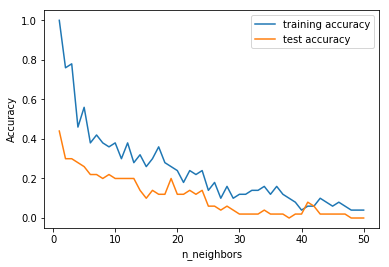

In [15]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 50
neighbors_settings = range(1, 51)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, Y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Problem 2: This problem explores linear regression along with ridge and lasso in a simple generated monte-carlo problem. First, to get things working you will need to load these routines into python.

In [16]:
# Load helpers
# Will try to just load what I need on this
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Now you will need to get the following function loaded.

In [17]:
# Function to generate linear data experiments
def genLinData(N,M,noise):
    # y = x_1 + x_2 .. x_M + eps
    # X's scaled so the variance of explained part is same order as noise variance (if eps = 1)
    sigNoise = np.sqrt(1./M)
    # set up random beta for regression
    beta = np.random.normal(size=(M,1),loc=0.,scale=1.)
    # force smaller betas to zero
    beta[abs(beta)<1.0]=0.
    # bused is the fraction of nonzero beta's
    betaUsed= np.sum( beta != 0)
    X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    eps = np.random.normal(size=(N,1),loc=0,scale=noise)
    # Python 2.7 users, this is the nifty new
    # python 3.6 notation for matrices
    # For nonmatrix students, this is the sum of the betas's time each X(m)
    # across all i
    y = X @ beta + eps
    return X, y, betaUsed

#### 2.1 First, generate one set of X, y data with sample length 300, with
#### M = 50 forecast variables, and noise=1. Do a short (iterations 100) monte-carlo run with the same set of data, but different random train/test splits (don’t use the random_state parameter since that fixes the random draws). Set the test_size = 0.5 for all problems here. On each split fit a linear regression and record the train and test score (R-squared). Report the mean and standard deviation for both of these across the 100 monte-carlos. (Python note: This involves a for loop across the 100 monte-carlo runs. Each iteration of the loop involves a new train/test split of the original data. Store results in either list, or (better) a numpy array.) The following block illustrates a shell of a monte-carlo program as an example. Many of the pieces are not included.

In [24]:
nmc = 100
rsquaretrain = np.zeros(nmc)
rsquaretest = np.zeros(nmc)
X, y, betaUsed = genLinData(300,50,1)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
    reg = LinearRegression().fit(X_train, y_train)
    rsquaretrain[i] = reg.score(X_train,y_train)
    rsquaretest[i] = reg.score(X_test,y_test)
# Put statistics here, np.mean() and np.std()
meantrain = np.mean(rsquaretrain)
stdtrain = np.std(rsquaretrain)
meantest = np.mean(rsquaretest)
stdtest = np.std(rsquaretest)
print("The score of test set are: \n{}".format(rsquaretest))
print("Mean of train set R-squared: {:.2f}".format(meantrain))
print("Standard deviation of train set R-squared: {:.2f}".format(stdtrain))
print("Mean of test set R-squared: {:.2f}".format(meantest))
print("Standard deviation of test set R-squared: {:.2f}".format(stdtest))

The score of test set are: 
[ 0.21799477  0.06271207  0.13246525  0.32716274  0.27903507  0.22268149
  0.172577    0.03772856  0.19063846  0.24010703  0.06558764  0.24542435
  0.148213   -0.09731108  0.32237321  0.23747455  0.14182391  0.26621512
  0.26773231  0.03793054 -0.26304937  0.29664675  0.37102677  0.1565102
  0.38286907  0.32736578  0.32195594  0.21171392  0.45981877  0.1417274
  0.27395899  0.19140969  0.34633252  0.11758694  0.18511808  0.17183976
  0.05627164  0.21440428  0.418219    0.09228243  0.06874367  0.06743722
  0.32846865  0.29860937  0.33845494  0.26652718  0.28763112  0.19898767
  0.09942671  0.12935197  0.27647551  0.04214382  0.25624124  0.27376336
  0.01801858  0.20176481  0.11317897  0.11905094  0.213115    0.29790359
  0.25147307  0.31324522  0.23816799  0.05212276  0.30822926  0.23948863
  0.2301208   0.35237754  0.06318793  0.42857967  0.2741989   0.14076212
  0.14538051  0.25163319  0.16478097  0.19091198  0.31487808  0.37164926
  0.25043869  0.1677081  

#### 2.2 Run this regression once on a sample size of 100,000. Report train and test scores. Are they close? Why or why not?

In [65]:
nmc = 100
rsquaretrain = np.zeros(nmc)
rsquaretest = np.zeros(nmc)
X, y, betaUsed = genLinData(100000,50,1)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
    reg = LinearRegression().fit(X_train, y_train)
    rsquaretrain[i] = reg.score(X_train,y_train)
    rsquaretest[i] = reg.score(X_test,y_test)
# Put statistics here, np.mean() and np.std()
meantrain = np.mean(rsquaretrain)
stdtrain = np.std(rsquaretrain)
meantest = np.mean(rsquaretest)
stdtest = np.std(rsquaretest)
print("Mean of train set R-squared: {:.2f}".format(meantrain))
print("Standard deviation of train set R-squared: {:.2f}".format(stdtrain))
print("Mean of test set R-squared: {:.2f}".format(meantest))
print("Standard deviation of test set R-squared: {:.2f}".format(stdtest))
print("The R-squared for the train and the test set are close. The reason is that as the number of data grow up, it is less possible for the regression to overfit the train set. Thus the regression becomes more accurate for both the train and the test sets.")

Mean of train set R-squared: 0.40
Standard deviation of train set R-squared: 0.00
Mean of test set R-squared: 0.40
Standard deviation of test set R-squared: 0.00
The R-squared for the train and the test set are close. The reason is that as the number of data grow up, it is less possible for the regression to overfit the train set. Thus the regression becomes more accurate for both the train and the test sets.


#### 2.3 Now, run a monte-carlo (iterations 100) where on each run you draw a new data set (X, y) from a sample size of 300 (M=50, noise = 1.0) using the above function. On each run estimate a linear model, and record the training and testing scores, and save them. Report the mean and standard deviation for these scores.

In [39]:
nmc = 100
rsquaretrain = np.zeros(nmc)
rsquaretest = np.zeros(nmc)
for i in range(nmc):
    X, y, betaUsed = genLinData(300,50,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
    reg = LinearRegression().fit(X_train, y_train)
    rsquaretrain[i] = reg.score(X_train,y_train)
    rsquaretest[i] = reg.score(X_test,y_test)
# Put statistics here, np.mean() and np.std()
meantrain = np.mean(rsquaretrain)
stdtrain = np.std(rsquaretrain)
meantest = np.mean(rsquaretest)
stdtest = np.std(rsquaretest)
print("Mean of train set R-squared: {:.2f}".format(meantrain))
print("Standard deviation of train set R-squared: {:.2f}".format(stdtrain))
print("Mean of test set R-squared: {:.2f}".format(meantest))
print("Standard deviation of test set R-squared: {:.2f}".format(stdtest))

Mean of train set R-squared: 0.63
Standard deviation of train set R-squared: 0.07
Mean of test set R-squared: 0.16
Standard deviation of test set R-squared: 0.15


#### 2.4 Simulate one new data set using the parameters from the last problem.
#### Now set up a Ridge regression. Set up a loop to sweep through alpha from 1 to 25 incremented by 1. Record the score for each ridge regression for each parameter. At the end, plot the R-squared scores for both the training and testing samples across the different values of alpha.

In [38]:
train_ridge_R = [ ]
test_ridge_R = [ ]
# try alpha from 1 to 25
alpha_settings = range(1, 26)
X, y, betaUsed = genLinData(300,50,1)
for i in alpha_settings:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)
    ridge = Ridge(alpha = i)
    # build the model
    ridge.fit(X_train, y_train)
    # record training set accuracy
    train_ridge_R.append(ridge.score(X_train, y_train))
    # record generalization accuracy
    test_ridge_R.append(ridge.score(X_test, y_test))

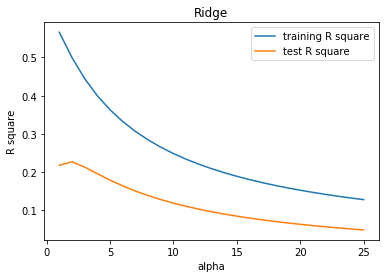

In [39]:
plt.plot(alpha_settings, train_ridge_R, label="training R square")
plt.plot(alpha_settings, test_ridge_R, label="test R square")
plt.ylabel("R square")
plt.xlabel("alpha")
plt.title("Ridge")
plt.legend()

#### 2.5 Now repeat this for a Lasso regression. However, this time sweep the alpha parameter from 0.01 through 0.03 incremented by 0.0005. Plot the two scores as you did in the last problem. Also, this time plot the number of non zero coefficients estimated by Lasso as a fraction of the true non zero coefficients from the simulation.

In [44]:
train_lasso_R = [ ]
test_lasso_R = [ ]
ratio = [ ]
# try alpha from 1 to 25
alpha_settings = np.arange(0.01, 0.0305, 0.0005)
X, y, betaUsed = genLinData(300,50,1)
for i in alpha_settings:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)
    lasso = Lasso(alpha = i)
    # build the model
    lasso.fit(X_train, y_train)
    # record training set accuracy
    train_lasso_R.append(lasso.score(X_train, y_train))
    # record generalization accuracy
    test_lasso_R.append(lasso.score(X_test, y_test))
    # calculate the fraction of coefficient usage
    ratio.append(np.sum(lasso.coef_ != 0)/betaUsed)

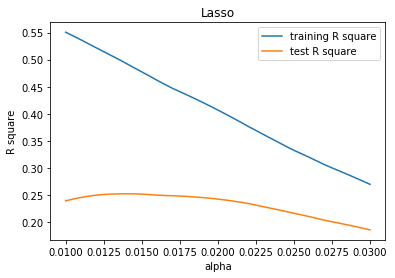

In [61]:
plt.plot(alpha_settings, train_lasso_R, label="training R square")
plt.plot(alpha_settings, test_lasso_R, label="test R square")
plt.ylabel("R square")
plt.xlabel("alpha")
plt.title("Lasso")
plt.legend()

Text(0.5,1,'Lasso')

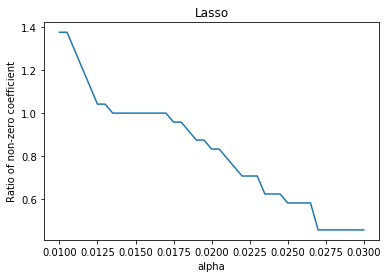

In [45]:
plt.plot(alpha_settings, ratio)
plt.ylabel("Ratio of non-zero coefficient")
plt.xlabel("alpha")
plt.title("Lasso")